In [1]:
import datajoint as dj

In [2]:
# Configuration 
dj.config['database.host'] = '127.0.0.1'
dj.config['database.user'] = 'root'
dj.config['database.password'] = 'tutorial'

# Connection
dj.conn()

Connecting root@127.0.0.1:3306


DataJoint connection (connected) root@127.0.0.1:3306

## Create a table 

In [3]:
# Create a schema
schema = dj.schema('tutorial', locals())

In [4]:
# Create a new table inheriting from Manual
@schema #decorator
class Mouse(dj.Manual):
      definition = """
      # mouse 
      mouse_id: int                  # unique mouse id
      ---
      dob: date                      # mouse date of birth
      sex: enum('M', 'F', 'U')    # sex of mouse - Male, Female, or Unknown/Unclassified
      """

# attribute definition: attribute_name :  data_type     # comment
# --- => separate primary (uniquely identify entries)/non-primary-key (description) attributes
# if error in the def: mouse.drop()

In [5]:
# Create an instance of the table => singleton 
mouse = Mouse()

In [6]:
mouse.delete()
mouse

About to delete:
Nothing to delete


mouse_id unique mouse id,dob mouse date of birth,"sex sex of mouse - Male, Female, or Unknown/Unclassified"


## Populate the table

In [7]:
# Using turple directly
mouse.insert1( (0, '2017-03-01', 'M') )

In [8]:
mouse

mouse_id unique mouse id,dob mouse date of birth,"sex sex of mouse - Male, Female, or Unknown/Unclassified"
0,2017-03-01,M


In [9]:
# Creating a dictionnary
data = {
  'mouse_id': 100,
  'dob': '2017-05-12',
  'sex': 'F'
}

mouse.insert1(data)

In [10]:
mouse

mouse_id unique mouse id,dob mouse date of birth,"sex sex of mouse - Male, Female, or Unknown/Unclassified"
0,2017-03-01,M
100,2017-05-12,F


In [11]:
# Multiple entries at a time using turple 
data = [
  (1, '2016-11-19', 'M'),
  (2, '2016-11-20', 'U'),
  (5, '2016-12-25', 'F')
]

# now insert all at once
mouse.insert(data)

In [12]:
mouse

mouse_id unique mouse id,dob mouse date of birth,"sex sex of mouse - Male, Female, or Unknown/Unclassified"
0,2017-03-01,M
1,2016-11-19,M
2,2016-11-20,U
5,2016-12-25,F
100,2017-05-12,F


In [13]:
# Multiple entries at a time using dictionnaries
data = [
    {'mouse_id': 10, 'dob':'2017-01-01', 'sex': 'F'},
  {'mouse_id': 11, 'dob': '2017-01-03', 'sex': 'F'},
]

#insert them all
mouse.insert(data)

In [14]:
mouse

mouse_id unique mouse id,dob mouse date of birth,"sex sex of mouse - Male, Female, or Unknown/Unclassified"
0,2017-03-01,M
1,2016-11-19,M
2,2016-11-20,U
5,2016-12-25,F
10,2017-01-01,F
11,2017-01-03,F
100,2017-05-12,F


In [15]:
mouse.insert1((0, '2015-03-03', 'U'))

DuplicateError: ("Duplicate entry '0' for key 'PRIMARY'", 'To ignore duplicate entries in insert, set skip_duplicates=True')

## Save the data pipeline

- Save the schema and definition of the tables (e.g., the `Mouse` class) in a .py file.

- In python terminal:
```
import datajoint as dj
>>> dj.config['database.host'] = ...      # specify your database address
>>> dj.config['database.user'] = ...      # specify your username
>>> dj.config['database.password'] = ...  # specify your password
>>> from tutorial_tables import *
````

- Create instance of the class to have the table with all entries.

## Queries and fetching 

In [16]:
data = mouse.fetch()    # this retrieves all data in the table

In [17]:
# Numpy structure array 
data 

array([(  0, datetime.date(2017, 3, 1), 'M'),
       (  1, datetime.date(2016, 11, 19), 'M'),
       (  2, datetime.date(2016, 11, 20), 'U'),
       (  5, datetime.date(2016, 12, 25), 'F'),
       ( 10, datetime.date(2017, 1, 1), 'F'),
       ( 11, datetime.date(2017, 1, 3), 'F'),
       (100, datetime.date(2017, 5, 12), 'F')],
      dtype=[('mouse_id', '<i8'), ('dob', 'O'), ('sex', 'O')])

In [18]:
mouse.fetch(as_dict=True)   # retrieve all data as list of dictionaries

[{'mouse_id': 0, 'dob': datetime.date(2017, 3, 1), 'sex': 'M'},
 {'mouse_id': 1, 'dob': datetime.date(2016, 11, 19), 'sex': 'M'},
 {'mouse_id': 2, 'dob': datetime.date(2016, 11, 20), 'sex': 'U'},
 {'mouse_id': 5, 'dob': datetime.date(2016, 12, 25), 'sex': 'F'},
 {'mouse_id': 10, 'dob': datetime.date(2017, 1, 1), 'sex': 'F'},
 {'mouse_id': 11, 'dob': datetime.date(2017, 1, 3), 'sex': 'F'},
 {'mouse_id': 100, 'dob': datetime.date(2017, 5, 12), 'sex': 'F'}]

In [19]:
# Only fetch given attribute
mouse.fetch('dob', as_dict=True)

[{'dob': datetime.date(2017, 3, 1)},
 {'dob': datetime.date(2016, 11, 19)},
 {'dob': datetime.date(2016, 11, 20)},
 {'dob': datetime.date(2016, 12, 25)},
 {'dob': datetime.date(2017, 1, 1)},
 {'dob': datetime.date(2017, 1, 3)},
 {'dob': datetime.date(2017, 5, 12)}]

In [20]:
sex, ids = mouse.fetch('sex', 'mouse_id')
sex, ids

(array(['M', 'M', 'U', 'F', 'F', 'F', 'F'], dtype=object),
 array([  0,   1,   2,   5,  10,  11, 100]))

In [21]:
# Adding data 
data_to_insert = [
    (3, '2016-11-19', 'M'), 
    (4, '2017-11-25', 'F'), 
    (6, '2017-11-16', 'M'), 
    (7, '2016-11-19', 'U'), 
    (8, '2016-11-20', 'U')
]
mouse.insert(data_to_insert)

In [22]:
mouse & 'sex = "M"'

mouse_id unique mouse id,dob mouse date of birth,"sex sex of mouse - Male, Female, or Unknown/Unclassified"
0,2017-03-01,M
1,2016-11-19,M
3,2016-11-19,M
6,2017-11-16,M


In [23]:
mouse & 'dob > "2017-01-01"' & 'sex = "F"'

mouse_id unique mouse id,dob mouse date of birth,"sex sex of mouse - Male, Female, or Unknown/Unclassified"
4,2017-11-25,F
11,2017-01-03,F
100,2017-05-12,F


In [24]:
# Using a dictionnary 
r_sex = {
    'sex': 'M'
}

mouse & r_sex

mouse_id unique mouse id,dob mouse date of birth,"sex sex of mouse - Male, Female, or Unknown/Unclassified"
0,2017-03-01,M
1,2016-11-19,M
3,2016-11-19,M
6,2017-11-16,M


In [25]:
(mouse & 'dob > "2017-01-01"' & 'sex = "M"').fetch()  #reduce data transfer speed & save space on computer

array([(0, datetime.date(2017, 3, 1), 'M'),
       (6, datetime.date(2017, 11, 16), 'M')],
      dtype=[('mouse_id', '<i8'), ('dob', 'O'), ('sex', 'O')])

In [28]:
# Delete entries 
(mouse & 'mouse_id = 10').delete()

About to delete:
`tutorial`.`mouse`: 1 items
Proceed? [yes, No]: yes
Committed.


In [29]:
mouse

mouse_id unique mouse id,dob mouse date of birth,"sex sex of mouse - Male, Female, or Unknown/Unclassified"
0,2017-03-01,M
1,2016-11-19,M
2,2016-11-20,U
3,2016-11-19,M
4,2017-11-25,F
5,2016-12-25,F
6,2017-11-16,M
7,2016-11-19,U
8,2016-11-20,U
11,2017-01-03,F


## Dependence 

In [30]:
## from tutorial_tables import *

In [31]:
@schema 
class Session(dj.Manual): 
    definition = """
    # experiment session
    -> Mouse                     # depends on Mouse table
    session_date: date           # session date
    ---
    experiment_setup: int        # experiment setup ID
    experimenter: varchar(128)   # name of the experimenter
    """

In [32]:
session = Session()

In [33]:
session.delete()
session 

About to delete:
Nothing to delete


mouse_id unique mouse id,session_date session date,experiment_setup experiment setup ID,experimenter name of the experimenter


In [34]:
data = {
      'mouse_id': 0, # -> need to be an id that already exists in 'Mouse'
      'session_date': '2017-05-15',
      'experiment_setup': 0,
      'experimenter': 'Edgar Y. Walker'
    }
session.insert1(data)

In [35]:
session

mouse_id unique mouse id,session_date session date,experiment_setup experiment setup ID,experimenter name of the experimenter
0,2017-05-15,0,Edgar Y. Walker


In [36]:
data = [
    {'mouse_id': 0, 'session_date':'2017-05-16', 'experiment_setup': 0, 'experimenter': 'Edgar Y.Walker'},
    {'mouse_id': 0, 'session_date':'2017-05-17', 'experiment_setup': 1, 'experimenter': 'Edgar Y.Walker'},
    {'mouse_id': 0, 'session_date':'2017-05-18', 'experiment_setup': 0, 'experimenter': 'Fabian Sinz'},
    {'mouse_id': 2, 'session_date':'2017-05-15', 'experiment_setup': 0, 'experimenter': 'Edgar Y.Walker'}    
]
session.insert(data)

In [37]:
mouse & session

mouse_id unique mouse id,dob mouse date of birth,"sex sex of mouse - Male, Female, or Unknown/Unclassified"
0,2017-03-01,M
2,2016-11-20,U


In [38]:
session & (mouse & 'sex = "M"')

mouse_id unique mouse id,session_date session date,experiment_setup experiment setup ID,experimenter name of the experimenter
0,2017-05-15,0,Edgar Y. Walker
0,2017-05-16,0,Edgar Y.Walker
0,2017-05-17,1,Edgar Y.Walker
0,2017-05-18,0,Fabian Sinz


In [39]:
session & 'session_date >= "2017-05-17"'

mouse_id unique mouse id,session_date session date,experiment_setup experiment setup ID,experimenter name of the experimenter
0,2017-05-17,1,Edgar Y.Walker
0,2017-05-18,0,Fabian Sinz


In [40]:
mouse & 'sex = "U"' & (session & 'session_date <= "2017-05-17"')

mouse_id unique mouse id,dob mouse date of birth,"sex sex of mouse - Male, Female, or Unknown/Unclassified"
2,2016-11-20,U


### Difference operator

In [41]:
mouse - session # mice that has no experiment yet, - operators only for tables, else !=

mouse_id unique mouse id,dob mouse date of birth,"sex sex of mouse - Male, Female, or Unknown/Unclassified"
1,2016-11-19,M
3,2016-11-19,M
4,2017-11-25,F
5,2016-12-25,F
6,2017-11-16,M
7,2016-11-19,U
8,2016-11-20,U
11,2017-01-03,F
100,2017-05-12,F


### Join operator

In [42]:
 mouse * session # all info together -> new table 

mouse_id unique mouse id,session_date session date,dob mouse date of birth,"sex sex of mouse - Male, Female, or Unknown/Unclassified",experiment_setup experiment setup ID,experimenter name of the experimenter
0,2017-05-15,2017-03-01,M,0,Edgar Y. Walker
0,2017-05-16,2017-03-01,M,0,Edgar Y.Walker
0,2017-05-17,2017-03-01,M,1,Edgar Y.Walker
0,2017-05-18,2017-03-01,M,0,Fabian Sinz
2,2017-05-15,2016-11-20,U,0,Edgar Y.Walker


## Importing data

In [43]:
(session & 'session_date >= "2017-05-16"').delete()
(session & 'mouse_id = 2').delete()

About to delete:
`tutorial`.`session`: 3 items
Proceed? [yes, No]: yes
Committed.
About to delete:
`tutorial`.`session`: 1 items
Proceed? [yes, No]: yes
Committed.


In [44]:
data = [
     {'mouse_id': 0, 'session_date':'2017-05-19', 'experiment_setup': 0, 'experimenter': 'Edgar Y.Walker'},
     {'mouse_id': 5, 'session_date':'2017-01-05', 'experiment_setup': 1, 'experimenter': 'Fabian Sinz'},
     {'mouse_id': 100, 'session_date':'2017-05-25', 'experiment_setup': 1, 'experimenter': 'Jake Reimer'},
]
session.insert(data)

In [45]:
session

mouse_id unique mouse id,session_date session date,experiment_setup experiment setup ID,experimenter name of the experimenter
0,2017-05-15,0,Edgar Y. Walker
0,2017-05-19,0,Edgar Y.Walker
5,2017-01-05,1,Fabian Sinz
100,2017-05-25,1,Jake Reimer


### Import the data

In [46]:
path_to_data = "data/"

In [47]:
import numpy as np     # import the numpy library
data = np.load(path_to_data + 'data_100_2017-05-25.npy')
data.shape

(1000,)

In [48]:
## from tutorial_tables import * #import the new 'Inported' table

In [55]:
neuron.drop()

`tutorial`.`_neuron` (0 tuples)
Proceed? [yes, No]: yes
Tables dropped.  Restart kernel.


In [56]:
@schema 
class Neuron(dj.Imported): 
    definition = """
    # measure from sessions
    -> Session
    ---
    activity: longblob    # electric activity of the neuron
    """
    
    def _make_tuples(self, key):    # _make_tuples takes a single argument `key` (a dictionary)
        # use key dictionary to determine the data file path
        data_file = path_to_data + "data_{mouse_id}_{session_date}.npy".format(**key)

        # load the data
        data = np.load(data_file)

        # add the loaded data as the "activity" column
        key['activity'] = data

        # insert the key into self
        self.insert1(key)

        print('Populated a neuron for {mouse_id} on {session_date}'.format(**key))

In [57]:
neuron = Neuron()

In [58]:
neuron.populate() # calls _make_tuples for every combination of parent tables -> extract primary key values

Populated a neuron for 0 on 2017-05-15
Populated a neuron for 0 on 2017-05-19
Populated a neuron for 5 on 2017-01-05
Populated a neuron for 100 on 2017-05-25


In [59]:
neuron

mouse_id unique mouse id,session_date session date,activity electric activity of the neuron
0,2017-05-15,=BLOB=
0,2017-05-19,=BLOB=
5,2017-01-05,=BLOB=
100,2017-05-25,=BLOB=


In [60]:
session.insert1((100, '2017-06-01', '1', 'Jake Reimer'))

In [61]:
neuron.populate()

Populated a neuron for 100 on 2017-06-01


## Computation

In [62]:
neuron

mouse_id unique mouse id,session_date session date,activity electric activity of the neuron
0,2017-05-15,=BLOB=
0,2017-05-19,=BLOB=
5,2017-01-05,=BLOB=
100,2017-05-25,=BLOB=
100,2017-06-01,=BLOB=


In [68]:
stats.drop()

`tutorial`.`__activity_statistics` (0 tuples)
Proceed? [yes, No]: yes
Tables dropped.  Restart kernel.


In [69]:
@schema
class ActivityStatistics(dj.Computed):
    definition = """
    -> Neuron
    ---
    mean: float    # mean activity
    stdev: float   # standard deviation of activity
    max: float     # maximum activity
    """

    def _make_tuples(self, key):
        activity = (Neuron() & key).fetch1('activity')    # fetch activity as NumPy array

        # compute various statistics on activity
        key['mean'] = activity.mean()   # compute mean
        key['stdev'] = activity.std()   # compute standard deviation
        key['max'] = activity.max()     # compute max
        self.insert1(key)
        print('Computed statistics for mouse_id {mouse_id} session_date {session_date}'.format(**key))

In [70]:
stats = ActivityStatistics()

In [71]:
stats

mouse_id unique mouse id,session_date session date,mean mean activity,stdev standard deviation of activity,max maximum activity


In [72]:
stats.populate()

Computed statistics for mouse_id 0 session_date 2017-05-15
Computed statistics for mouse_id 0 session_date 2017-05-19
Computed statistics for mouse_id 5 session_date 2017-01-05
Computed statistics for mouse_id 100 session_date 2017-05-25
Computed statistics for mouse_id 100 session_date 2017-06-01


In [73]:
stats

mouse_id unique mouse id,session_date session date,mean mean activity,stdev standard deviation of activity,max maximum activity
0,2017-05-15,0.207357,0.400867,2.48161
0,2017-05-19,0.13274,0.291462,1.82805
5,2017-01-05,0.0891786,0.236412,1.37389
100,2017-05-25,0.21907,0.328783,1.76383
100,2017-06-01,0.0873266,0.237858,1.32454


In [74]:
@schema
class SpikeDetectionParam(dj.Lookup): # values for a computation rather than raw data
    definition = """
    sdp_id: int       # unique id for spike detection parameter set
    ---
    threshold: float  # threshold for spike detection
    """

In [75]:
sdp = SpikeDetectionParam()

In [76]:
sdp.insert1({'sdp_id': 0, 'threshold': 0.9})
sdp

sdp_id unique id for spike detection parameter set,threshold threshold for spike detection
0,0.9


In [81]:
spikes.drop()

`tutorial`.`__spikes` (0 tuples)
Proceed? [yes, No]: yes
Tables dropped.  Restart kernel.


In [82]:
@schema
class Spikes(dj.Computed):
    definition = """
    # spikes for a neuron at a certain threshold
    -> Neuron
    -> SpikeDetectionParam
    ---
    spikes: longblob     # detected spikes
    count: int           # total number of detected spikes
    """

    def _make_tuples(self, key):
        print('Populating for: ', key)

        activity = (Neuron() & key).fetch1('activity')
        threshold = (SpikeDetectionParam() & key).fetch1('threshold')

        above_thrs = (activity > threshold).astype(int)   # find activity above threshold
        rising = (np.diff(above_thrs) > 0).astype(int)   # find rising edge of crossing threshold
        spikes = np.hstack((0, rising))    # prepend 0 to account for shortening due to np.diff
        count = spikes.sum()   # compute total spike counts
        print('Detected {} spikes!\n'.format(count))

        # save results and insert
        key['spikes'] = spikes
        key['count'] = count
        self.insert1(key)

In [83]:
spikes = Spikes()

In [84]:
spikes.populate()

Populating for:  {'mouse_id': 0, 'session_date': datetime.date(2017, 5, 15), 'sdp_id': 0}
Detected 27 spikes!

Populating for:  {'mouse_id': 0, 'session_date': datetime.date(2017, 5, 19), 'sdp_id': 0}
Detected 21 spikes!

Populating for:  {'mouse_id': 5, 'session_date': datetime.date(2017, 1, 5), 'sdp_id': 0}
Detected 14 spikes!

Populating for:  {'mouse_id': 100, 'session_date': datetime.date(2017, 5, 25), 'sdp_id': 0}
Detected 35 spikes!

Populating for:  {'mouse_id': 100, 'session_date': datetime.date(2017, 6, 1), 'sdp_id': 0}
Detected 15 spikes!



In [85]:
spikes

mouse_id unique mouse id,session_date session date,sdp_id unique id for spike detection parameter set,spikes detected spikes,count total number of detected spikes
0,2017-05-15,0,=BLOB=,27
0,2017-05-19,0,=BLOB=,21
5,2017-01-05,0,=BLOB=,14
100,2017-05-25,0,=BLOB=,35
100,2017-06-01,0,=BLOB=,15


In [86]:
sdp.insert1({'sdp_id': 1, 'threshold': 0.1})
sdp

sdp_id unique id for spike detection parameter set,threshold threshold for spike detection
0,0.9
1,0.1


In [87]:
spikes.populate()

Populating for:  {'mouse_id': 0, 'session_date': datetime.date(2017, 5, 15), 'sdp_id': 1}
Detected 128 spikes!

Populating for:  {'mouse_id': 0, 'session_date': datetime.date(2017, 5, 19), 'sdp_id': 1}
Detected 135 spikes!

Populating for:  {'mouse_id': 5, 'session_date': datetime.date(2017, 1, 5), 'sdp_id': 1}
Detected 132 spikes!

Populating for:  {'mouse_id': 100, 'session_date': datetime.date(2017, 5, 25), 'sdp_id': 1}
Detected 142 spikes!

Populating for:  {'mouse_id': 100, 'session_date': datetime.date(2017, 6, 1), 'sdp_id': 1}
Detected 151 spikes!



In [88]:
sdp.insert1({'sdp_id': 2, 'threshold': 1.3})
spikes.populate()
spikes

Populating for:  {'mouse_id': 0, 'session_date': datetime.date(2017, 5, 15), 'sdp_id': 2}
Detected 13 spikes!

Populating for:  {'mouse_id': 0, 'session_date': datetime.date(2017, 5, 19), 'sdp_id': 2}
Detected 5 spikes!

Populating for:  {'mouse_id': 5, 'session_date': datetime.date(2017, 1, 5), 'sdp_id': 2}
Detected 1 spikes!

Populating for:  {'mouse_id': 100, 'session_date': datetime.date(2017, 5, 25), 'sdp_id': 2}
Detected 9 spikes!

Populating for:  {'mouse_id': 100, 'session_date': datetime.date(2017, 6, 1), 'sdp_id': 2}
Detected 2 spikes!



mouse_id unique mouse id,session_date session date,sdp_id unique id for spike detection parameter set,spikes detected spikes,count total number of detected spikes
0,2017-05-15,0,=BLOB=,27
0,2017-05-15,1,=BLOB=,128
0,2017-05-15,2,=BLOB=,13
0,2017-05-19,0,=BLOB=,21
0,2017-05-19,1,=BLOB=,135
0,2017-05-19,2,=BLOB=,5
5,2017-01-05,0,=BLOB=,14
5,2017-01-05,1,=BLOB=,132
5,2017-01-05,2,=BLOB=,1
100,2017-05-25,0,=BLOB=,35


In [89]:
spikes * sdp

mouse_id unique mouse id,session_date session date,sdp_id unique id for spike detection parameter set,spikes detected spikes,count total number of detected spikes,threshold threshold for spike detection
0,2017-05-15,0,=BLOB=,27,0.9
0,2017-05-19,0,=BLOB=,21,0.9
5,2017-01-05,0,=BLOB=,14,0.9
100,2017-05-25,0,=BLOB=,35,0.9
100,2017-06-01,0,=BLOB=,15,0.9
0,2017-05-15,1,=BLOB=,128,0.1
0,2017-05-19,1,=BLOB=,135,0.1
5,2017-01-05,1,=BLOB=,132,0.1
100,2017-05-25,1,=BLOB=,142,0.1
100,2017-06-01,1,=BLOB=,151,0.1


## Additional info

`Manual` tables have no prefix.

`Lookup` tables are prefixed with #.

`Imported` tables are prefixed with _, a single underscore.

`Computed` tables are prefixed with __, two underscores.

In [90]:
# Reverse engineer a table definition
spikes.describe()

# spikes for a neuron at a certain threshold
-> Neuron
-> SpikeDetectionParam
---
spikes               : longblob                     # detected spikes
count                : int                          # total number of detected spikes



'# spikes for a neuron at a certain threshold\n-> Neuron\n-> SpikeDetectionParam\n---\nspikes               : longblob                     # detected spikes\ncount                : int                          # total number of detected spikes\n'

In [91]:
spikes.progress() # see how much the table was populated

Spikes               Completed 15 of 15 (100.0%)   2021-03-02 10:31:12


(0, 15)

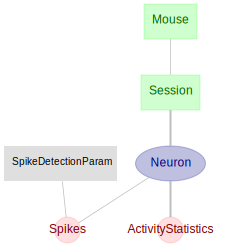

In [92]:
dj.ERD(schema)